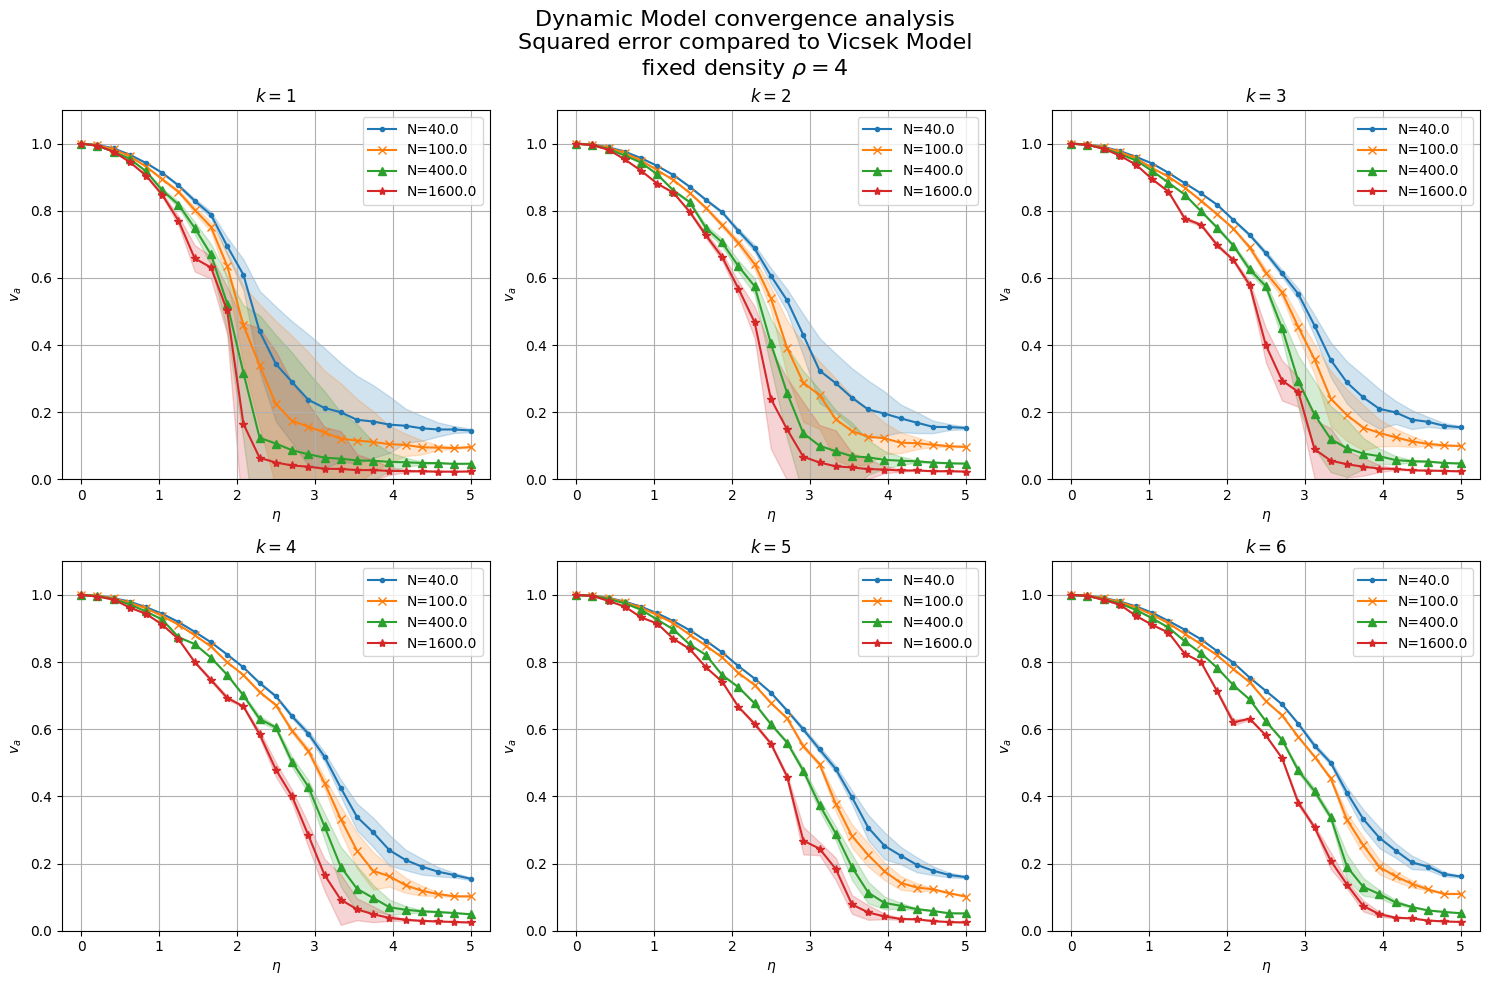

In [11]:
import numpy as np
import matplotlib.pyplot as plt

k_values = [1, 2, 3, 4, 5, 6]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Dynamic Model convergence analysis\nSquared error compared to Vicsek Model\n" + r"fixed density $\rho = 4$", fontsize=16)

# Define a list of colors to distinguish between the particle groups
colors = ['C0', 'C1', 'C2', 'C3', 'C4']
# Define different markers for the different k values
markers = ['.-', 'x-', '^-', '*-', 'p-']

# Vicsek model with fixed radius as reference
# Create the file name based on the k value
filename_vicsek = f"../data/VicsekModel/Fig2a/Fig2a_rRadius_r1_t25000.txt"

N_vicsek, n_vicsek, t_vicsek, va_vicsek, prev_vicsek = np.genfromtxt(filename_vicsek, delimiter=',', unpack=True, skip_header=True)

for j, k in enumerate(k_values):
    # Determine the position of the subplot
    row = j // 3
    col = j % 3

    # Create the file name based on the k value
    filename = f"../data/VicsekModel/Fig2a/Fig2a_rkFixedRadius_k{k}_r1_t25000.txt"

    N, n, t, va, prev = np.genfromtxt(filename, delimiter=',', unpack=True, skip_header=True)

    # Group by N
    unique_N = np.unique(N)
    for index, N_value in enumerate(unique_N):
        mask = N == N_value
        color = colors[index % len(colors)]
        # Get squared error to reference
        squared_error = (va[mask] - va_vicsek[mask])**2
        # Get mean squared error
        mse = np.mean(squared_error)
        # Get root mean squared error
        rmse = np.sqrt(mse)
        # Get relative root mean squared error
        rrmse = rmse / np.mean(va_vicsek[mask])
        # Plot the relative root mean squared error
        axs[row, col].plot(n[mask], va[mask], markers[index], color=color, label=f'N={N_value}')
        axs[row, col].fill_between(n[mask], va[mask] - squared_error, va[mask] + squared_error, color=color, alpha=0.2)
    
    axs[row, col].set_xlabel(r"$\eta$")
    axs[row, col].set_ylabel(r"$v_a$")
    axs[row, col].set_ylim((0,1.1))
    axs[row, col].grid()
    axs[row, col].set_title(rf"$k = {k}$")
    axs[row, col].legend()

# Adjust spacing
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.savefig("../plots/ConvergenceAnalysis_VicsekToDynamic.pdf")
plt.show()


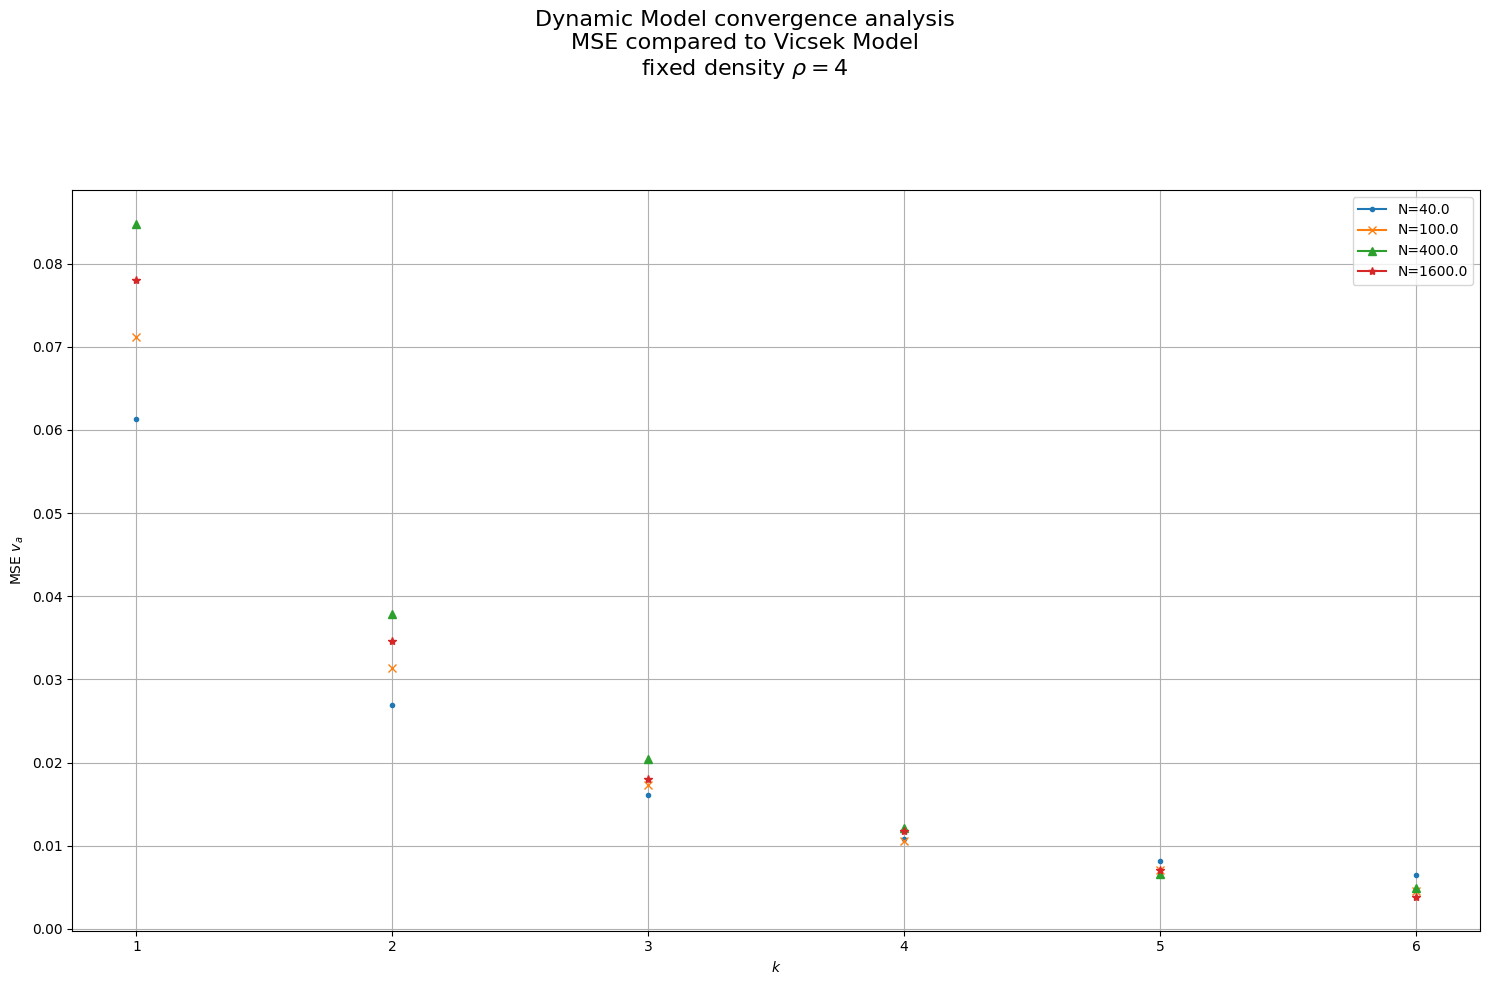

In [43]:
import numpy as np
import matplotlib.pyplot as plt

k_values = [1, 2, 3, 4, 5, 6]

fig, axs = plt.subplots(figsize=(15, 10))
fig.suptitle("Dynamic Model convergence analysis\nMSE compared to Vicsek Model\n" + r"fixed density $\rho = 4$", fontsize=16)

axs.set_xlabel(r"$k$")
axs.set_ylabel(r"MSE $v_a$")
axs.grid()

# Define a list of colors to distinguish between the particle groups
colors = ['C0', 'C1', 'C2', 'C3', 'C4']
# Define different markers for the different k values
markers = ['.-', 'x-', '^-', '*-', 'p-']

# Vicsek model with fixed radius as reference
# Create the file name based on the k value
filename_vicsek = f"../data/VicsekModel/Fig2a/Fig2a_rRadius_r1_t25000.txt"

N_vicsek, n_vicsek, t_vicsek, va_vicsek, prev_vicsek = np.genfromtxt(filename_vicsek, delimiter=',', unpack=True, skip_header=True)

for j, k in enumerate(k_values):
    # Determine the position of the subplot
    row = j // 3
    col = j % 3

    # Create the file name based on the k value
    filename = f"../data/VicsekModel/Fig2a/Fig2a_rkFixedRadius_k{k}_r1_t25000.txt"

    N, n, t, va, prev = np.genfromtxt(filename, delimiter=',', unpack=True, skip_header=True)

    # Group by N
    unique_N = np.unique(N)
    for index, N_value in enumerate(unique_N):
        mask = N == N_value
        color = colors[index % len(colors)]
        # Get squared error to reference
        squared_error = (va[mask] - va_vicsek[mask])**2
        # Get mean squared error
        mse = np.mean(squared_error)
        # Get root mean squared error
        rmse = np.sqrt(mse)
        # Get relative root mean squared error
        rrmse = rmse / np.mean(va_vicsek[mask])
        # Plot the relative root mean squared error
        axs.plot(k, mse, markers[index], color=color)
        
# Create custom legend (only show one entry per group)
axs.legend([f'N={N_value}' for N_value in unique_N])
# Adjust spacing
fig.tight_layout()
fig.subplots_adjust(top=0.80)
plt.savefig("../plots/ConvergenceAnalysis_VicsekToDynamic_MSE.pdf")
plt.show()


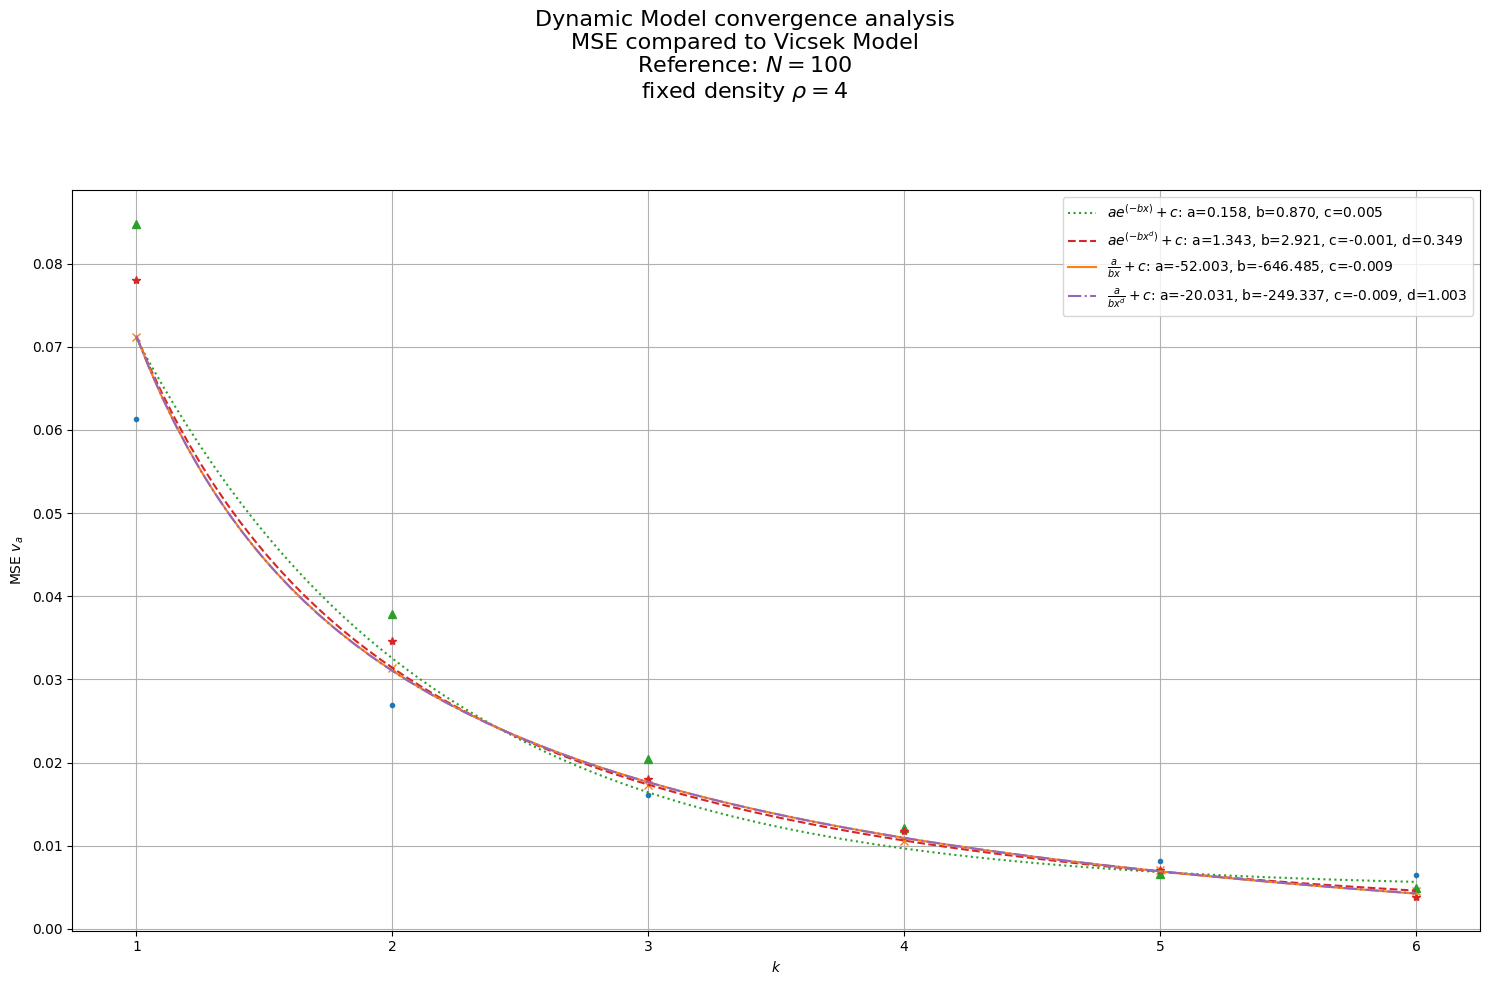

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

k_values = [1, 2, 3, 4, 5, 6]

fig, axs = plt.subplots(figsize=(15, 10))
fig.suptitle("Dynamic Model convergence analysis\nMSE compared to Vicsek Model\nReference: $N=100$\n" + r"fixed density $\rho = 4$", fontsize=16)

axs.set_xlabel(r"$k$")
axs.set_ylabel(r"MSE $v_a$")
axs.grid()

# Define a list of colors to distinguish between the particle groups
colors = ['C0', 'C1', 'C2', 'C3', 'C4']
# Define different markers for the different k values
markers = ['.-', 'x-', '^-', '*-', 'p-']

# Vicsek model with fixed radius as reference
# Create the file name based on the k value
filename_vicsek = f"../data/VicsekModel/Fig2a/Fig2a_rRadius_r1_t25000.txt"

N_vicsek, n_vicsek, t_vicsek, va_vicsek, prev_vicsek = np.genfromtxt(filename_vicsek, delimiter=',', unpack=True, skip_header=True)

# Array to store the mean squared error
# The MSEs for N=100 only are stored
mse_array = np.zeros(len(k_values))

for j, k in enumerate(k_values):
    # Determine the position of the subplot
    row = j // 3
    col = j % 3

    # Create the file name based on the k value
    filename = f"../data/VicsekModel/Fig2a/Fig2a_rkFixedRadius_k{k}_r1_t25000.txt"

    N, n, t, va, prev = np.genfromtxt(filename, delimiter=',', unpack=True, skip_header=True)

    # Group by N
    unique_N = np.unique(N)
    for index, N_value in enumerate(unique_N):
        mask = N == N_value
        color = colors[index % len(colors)]
        # Get squared error to reference
        squared_error = (va[mask] - va_vicsek[mask])**2
        # Get mean squared error
        mse = np.mean(squared_error)
        if N_value == 100: mse_array[j] = mse         
        # Get root mean squared error
        rmse = np.sqrt(mse)
        # Get relative root mean squared error
        rrmse = rmse / np.mean(va_vicsek[mask])
        # Plot the relative root mean squared error
        axs.plot(k, mse, markers[index], color=color)

# Define several declinig functions to fit the data
def f(x, a, b, c):
    return a * np.exp(-b * x) + c

def g(x, a, b, c):
    return a / (b * x) + c

def h(x, a, b, c, d):
    return a * np.exp(-b * x**d) + c

def i(x, a, b, c, d):
    return a / (b * x**d) + c

# Fit the data with all three functions
popt, pcov = curve_fit(f, k_values, mse_array)
popt2, pcov2 = curve_fit(g, k_values, mse_array)
popth, pcovh = curve_fit(h, k_values, mse_array)
popti, pcovi = curve_fit(i, k_values, mse_array)

# Plot the fitted functions
x = np.linspace(1, 6, 100)
axs.plot(x, f(x, *popt), ":", label='$a e^{(-bx)} + c$: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt), color= "C2")
axs.plot(x, h(x, *popth), "--", label='$a e^{(-bx^d)} + c$: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popth), color= "C3")
axs.plot(x, g(x, *popt2), label=r'$\frac{a}{bx} + c$: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2), color= "C1")
axs.plot(x, i(x, *popti), "-.", label=r'$\frac{a}{bx^d} + c$: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popti), color= "C4")

axs.legend()
# Create custom legend (only show one entry per group)
labels = [f'N={N_value}' for N_value in unique_N]
# Adjust spacing
fig.tight_layout()
fig.subplots_adjust(top=0.80)
plt.savefig("../plots/ConvergenceAnalysis_VicsekToDynamic_MSE_Fit.pdf")
plt.show()
